## Basics

In [1]:
from primitives import Parameters
p = Parameters()
import numpy as np

In [2]:
#print("Before first call:", cc.__dict__)
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi)=cc.J()
#print("After first call:", cc.__dict__)

In [2]:
from BasicContract_r import BasicContract_r

bc=BasicContract_r(5,cc.js,p)

(bcr_J,bcr_W)=bc.J_K()

NameError: name 'cc' is not defined

In [4]:
from BasicContract import BasicContract

bc=BasicContract(10,cc.js,p)

(best_r_old,bc_J_old)=bc.J_K()

# Plots

In [4]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_Wstar[p.z_0-1, :]-cc_W[p.z_0-1, :], label='Standard method')
plt.plot(bcr_W[p.z_0-1,:], ccinv_Wstar[p.z_0-1, :]-ccinv_W[p.z_0-1,:], label='Inversed expectation')
plt.legend()
# Add titles and labels
plt.title('Future value across methods')
plt.xlabel('Worker value')
plt.ylabel('Future value')

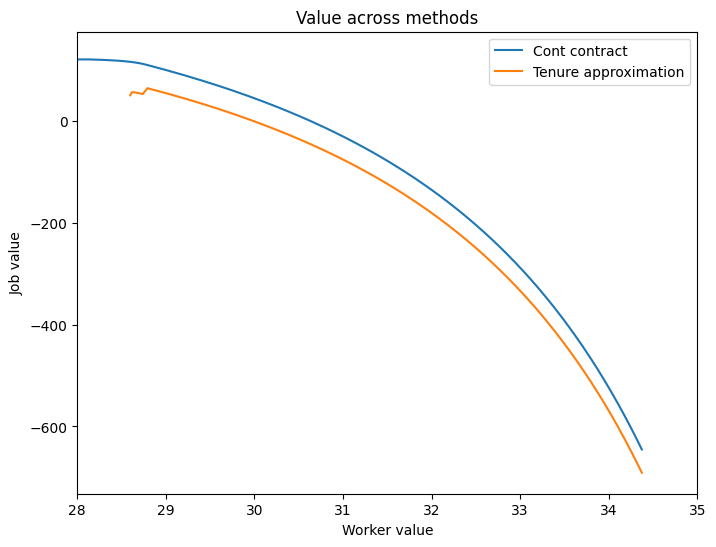

In [9]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Cont contract')
plt.plot(bcr_W[p.z_0-1,:,0], bcr_J[p.z_0-1, :,0], label='Tenure approximation')

# Add titles and labels
plt.title('Value across methods')
plt.xlabel('Worker value')
plt.ylabel('Job value')

# Optionally set x and y limits
# plt.xlim([-30, 30])
# plt.ylim([150, 200])

# Add legend
plt.legend()

# Save the plot to a file in the specified directory
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods.png'), bbox_inches='tight')  # Save as PNG


# Optionally set x and y limits
plt.xlim([28, 35])
#plt.ylim([130, 140])
# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods zoom.png'), bbox_inches='tight')  # Save as PNG

# Show the plot (optional)
plt.show()

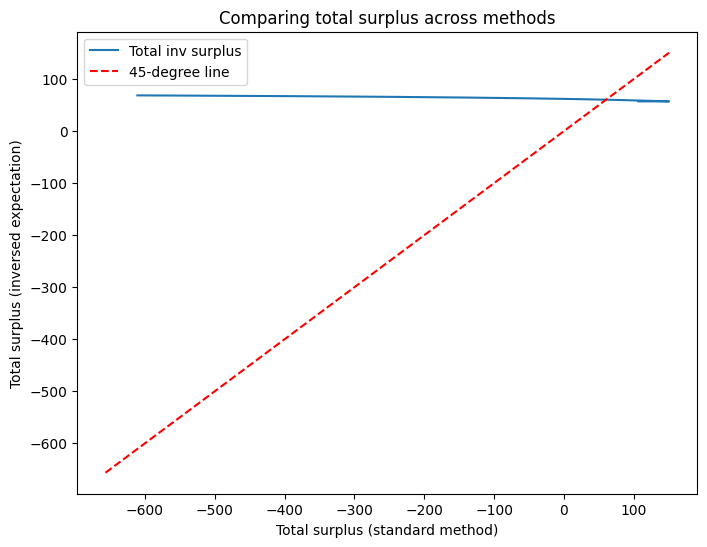

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))#This creates a figure and a set of subplots with a specific size. The size is specified in inches (width, height).

# Plot the original data
ax.plot(cc_W[p.z_0-1,:]+cc_J[p.z_0-1,:], bcr_W[p.z_0-1,:,0]+bcr_W[p.z_0-1,:,0], label='Total inv surplus')

# Calculate the range for the 45-degree line
x_vals = cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:]
y_vals = bcr_W[p.z_0-1,:,0] + bcr_J[p.z_0-1,:,0]
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))

# Add the 45-degree line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='45-degree line')

# Add titles and labels
ax.set_title('Comparing total surplus across methods')
ax.set_xlabel('Total surplus (standard method)')
ax.set_ylabel('Total surplus (inversed expectation)')
ax.legend()

# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Total surplus comparison.png'), bbox_inches='tight')  # Save as PNG
#    plt.savefig(os.path.join(output_dir,'Total surplus comparison.pdf'), bbox_inches='tight')  # Save as PDF

# Show the plot
plt.show()

#Previous version, without beta